In [348]:
# https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

vgchartzfull is a python script based on BeautifulSoup. It creates a dataset based on data from http://www.vgchartz.com/gamedb/

The dataset is saved as vgsales.csv.

You will need to have BeautifulSoup added. It can be installed by pip.

sudo pip install BeautifulSoup

Thanks to Chris Albon. http://chrisalbon.com/python/beautiful_soup_scrape_table.html

In [349]:
# I can understand the columns named Severity_Mild, Severity_Moderate, Severity_Severe 
# but what is Severity_None?
# No you have to consider, its like when some people don't know the severity of their symptoms.
# But if you are making severity as target variable then drop the Severity_None.

#Makeup Artist was released in 2009, not 2020
# of copies sold= Does sales refer to a specific currency? I.e, the columns represent sales in millions of U.S dollars?
#Or does sales refer to the number of units/copies sold?

Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd
import scipy.stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

# Loading the data

In [351]:
games_df= pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv") ## loading data

games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Data Description:

- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- Publisher - game genre
- NA_sales - North American sales (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Global_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critic score (maximum 100), Aggregate score compiled by Metacritic staff
- Critic_count - The number of critics used in coming up with the Criticscore
- User_Score - user score (maximum 10), Score by Metacritic's subscribers
- Rating - rating from the organization ESRB (English Entertainment Software Rating Board).
- Developer - Party responsible for creating the game

In [352]:
type("User_Score")

str

In [353]:
# games_df['User_Score'] = games_df['User_Score'].astype(float)

In [354]:
#games_df = pd.DataFrame('User_Score')
#print (games_df)
#print (games_df.dtypes)

In [355]:
#games_df = pd.DataFrame(games_df)
#games_df['User_Score'] = games_df['User_Score'].astype(float)

#print (games_df)
#print (games_df.dtypes)

In [356]:
games_df['User_Score'] = pd.to_numeric(games_df['User_Score'],errors='coerce')

In [357]:
type("User_Score")

str

In [358]:
nRow, nCol = games_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 16719 rows and 16 columns


In [359]:
# checing which datatypes we have in our dataframe.
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [360]:
games_df['User_Score'] = games_df['User_Score'].astype(float, errors = 'raise')

print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB
None


In [361]:
# games_df.drop_duplicates() #remove duplicate rows, we don't have

In [362]:
# games_df.loc[(games_df != 0).any(1)] # remove rows whith only 0 value, we don't have

In [363]:
round(games_df.isna().sum()/len(games_df),4)*100  # shows the percentage of null values in a column

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
Publisher           0.32
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Other_Sales         0.00
Global_Sales        0.00
Critic_Score       51.33
Critic_Count       51.33
User_Score         54.60
User_Count         54.60
Developer          39.61
Rating             40.49
dtype: float64

In [364]:
# games_df.drop(games_df[games_df.isnull().sum(axis=1)>7].index,axis=0,inplace=True)
# rows=16701, is deleting 18 rows

In [365]:
games_df.drop(games_df[games_df.isnull().sum(axis=1)>6].index,axis=0,inplace=True)
# rows=16608, is deleting 111 rows

In [366]:
#games_df.drop(games_df[games_df.isnull().sum(axis=1)>5].index,axis=0,inplace=True)
# rows=10123, is deleting 6796 rows, we lose to many colomns

In [367]:
#games_df.drop(games_df[games_df.isnull().sum(axis=1)>15].index,axis=0,inplace=True)

print(round(100*(1-games_df.count()/len(games_df)),2))

Name                0.00
Platform            0.00
Year_of_Release     1.14
Genre               0.00
Publisher           0.05
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Other_Sales         0.00
Global_Sales        0.00
Critic_Score       51.01
Critic_Count       51.01
User_Score         54.30
User_Count         54.30
Developer          39.21
Rating             40.09
dtype: float64


In [368]:
# Replacing null values with means of the column (for numerical columns)
mean_year_of_release = np.mean(games_df['Year_of_Release'])
games_df['Year_of_Release'] = games_df['Year_of_Release'].fillna(mean_year_of_release)

In [369]:
mean_critic_score = np.mean(games_df['Critic_Score'])
games_df['Critic_Score'] = games_df['Critic_Score'].fillna(mean_critic_score)

In [370]:
mean_critic_count = np.mean(games_df['Critic_Count'])
games_df['Critic_Count'] = games_df['Critic_Count'].fillna(mean_critic_count)

In [371]:
#mean_user_score = np.mean(games_df['User_Score'])
#games_df['User_Score'] = games_df['User_Score'].fillna(mean_user_score)

In [372]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN


In [373]:
games_df.describe().T # transpus

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16608.0,2006.490651,5.847324,1980.00,2003.000000,2007.000000,2010.000000,2020.00
NA_Sales,16608.0,0.263750,0.815637,0.00,0.000000,0.080000,0.240000,41.36
EU_Sales,16608.0,0.145626,0.504795,0.00,0.000000,0.020000,0.110000,28.96
JP_Sales,16608.0,0.077826,0.309691,0.00,0.000000,0.000000,0.040000,10.22
Other_Sales,16608.0,0.047572,0.187276,0.00,0.000000,0.010000,0.030000,10.57
Global_Sales,16608.0,0.535026,1.552466,0.01,0.060000,0.170000,0.470000,82.53
Critic_Score,16608.0,68.967679,9.755858,13.00,68.967679,68.967679,70.000000,98.00
Critic_Count,16608.0,26.360821,13.285179,3.00,22.000000,26.360821,26.360821,113.00
User_Score,7590.0,7.125046,1.500006,0.00,6.400000,7.500000,8.200000,9.70
User_Count,7590.0,162.229908,561.282326,4.00,10.000000,24.000000,81.000000,10665.00


In [374]:
games_df['Name'].value_counts(dropna=False)

Need for Speed: Most Wanted    12
Ratatouille                     9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
FIFA 14                         9
                               ..
Lunar: Silver Star Story        1
Virtua Fighter Kids             1
Gundam Battle Assault           1
NCAA GameBreaker 2003           1
Haitaka no Psychedelica         1
Name: Name, Length: 11473, dtype: int64

In [375]:
games_df["Platform"].value_counts()

PS2     2152
DS      2140
PS3     1324
Wii     1313
X360    1258
PSP     1202
PS      1194
PC       972
XB       822
GBA      794
GC       554
3DS      517
PSV      430
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [376]:
games_df["Year_of_Release"].value_counts()

2008.000000    1427
2009.000000    1426
2010.000000    1254
2007.000000    1196
2011.000000    1135
2006.000000    1006
2005.000000     934
2002.000000     829
2003.000000     775
2004.000000     743
2012.000000     653
2015.000000     606
2014.000000     581
2013.000000     544
2016.000000     500
2001.000000     482
1998.000000     379
2000.000000     350
1999.000000     338
1997.000000     289
1996.000000     263
1995.000000     219
2006.490651     189
1994.000000     121
1993.000000      60
1981.000000      46
1992.000000      43
1991.000000      41
1982.000000      36
1986.000000      21
1989.000000      17
1983.000000      17
1990.000000      16
1987.000000      16
1988.000000      15
1985.000000      14
1984.000000      14
1980.000000       9
2017.000000       3
2020.000000       1
Name: Year_of_Release, dtype: int64

In [377]:
games_df["Genre"].value_counts()

Action          3350
Sports          2337
Misc            1717
Role-Playing    1490
Shooter         1320
Adventure       1297
Racing          1243
Platform         886
Simulation       869
Fighting         843
Strategy         681
Puzzle           575
Name: Genre, dtype: int64

In [378]:
games_df["Publisher"].value_counts()

Electronic Arts                 1356
Activision                       982
Namco Bandai Games               938
Ubisoft                          932
Konami Digital Entertainment     831
                                ... 
Max Five                           1
On Demand                          1
Bomb                               1
Detn8 Games                        1
Red Flagship                       1
Name: Publisher, Length: 579, dtype: int64

In [379]:
games_df["Developer"].value_counts()

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [380]:
games_df["User_Count"].value_counts()

4.0       344
6.0       341
5.0       335
8.0       283
7.0       269
         ... 
443.0       1
1571.0      1
953.0       1
1287.0      1
412.0       1
Name: User_Count, Length: 888, dtype: int64

In [381]:
# TBD is an abbreviation often meaning in ordinary writing "to be discussed", "to be done", "to be defined", 
# "to be decided", "to be determined","to be declared","to be deleted","to be disclosed", “to be denounced”,etc. 
# maxim 10
# User_score - Score by Metacritic's subscribers

games_df["User_Score"].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: User_Score, Length: 95, dtype: int64

In [382]:
s = pd.Series(["User_Score"])
s.replace({'tbd': 'NaN'})

0    User_Score
dtype: object

In [383]:
games_df["User_Score"].value_counts()


7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: User_Score, Length: 95, dtype: int64

In [384]:
# checing which datatypes we have in our dataframe.
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16608 non-null  object 
 1   Platform         16608 non-null  object 
 2   Year_of_Release  16608 non-null  float64
 3   Genre            16608 non-null  object 
 4   Publisher        16599 non-null  object 
 5   NA_Sales         16608 non-null  float64
 6   EU_Sales         16608 non-null  float64
 7   JP_Sales         16608 non-null  float64
 8   Other_Sales      16608 non-null  float64
 9   Global_Sales     16608 non-null  float64
 10  Critic_Score     16608 non-null  float64
 11  Critic_Count     16608 non-null  float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.2+ MB


In [385]:
games_df.corr() #high correlation

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.092226,0.003901,-0.168558,0.037609,-0.076290,0.005765,0.110424,-0.265094,0.174938
NA_Sales,-0.092226,1.000000,0.765533,0.450284,0.638885,0.941092,0.185215,0.227264,0.086200,0.246429
EU_Sales,0.003901,0.765533,1.000000,0.435360,0.722672,0.901284,0.194557,0.244601,0.055337,0.283360
JP_Sales,-0.168558,0.450284,0.435360,1.000000,0.291165,0.612685,0.091419,0.107969,0.125598,0.075638
Other_Sales,0.037609,0.638885,0.722672,0.291165,1.000000,0.749256,0.184931,0.234375,0.057119,0.238982
Global_Sales,-0.076290,0.941092,0.901284,0.612685,0.749256,1.000000,0.201058,0.248646,0.088139,0.265012
Critic_Score,0.005765,0.185215,0.194557,0.091419,0.184931,0.201058,1.000000,0.425504,0.539861,0.265260
Critic_Count,0.110424,0.227264,0.244601,0.107969,0.234375,0.248646,0.425504,1.000000,0.183886,0.363438
User_Score,-0.265094,0.086200,0.055337,0.125598,0.057119,0.088139,0.539861,0.183886,1.000000,0.027044
User_Count,0.174938,0.246429,0.283360,0.075638,0.238982,0.265012,0.265260,0.363438,0.027044,1.000000


In [386]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,NaN,NaN,NaN,NaN


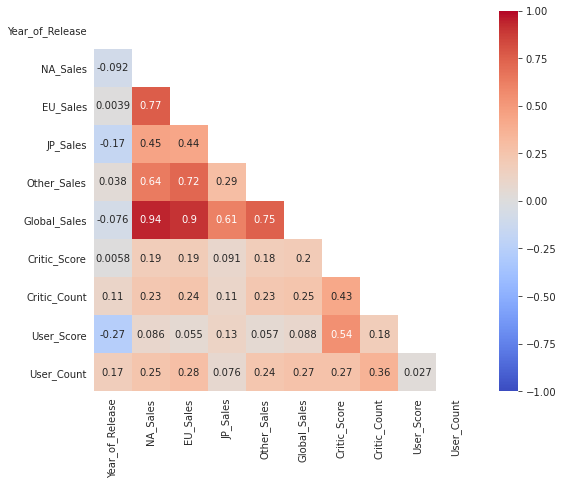

In [387]:
# plotting the correlation heatmap
corr = games_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [388]:
# Highly Correlated Columns
corr_matrix=games_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['Global_Sales']

In [389]:
# drop the ("Global_Sales"), it is hy corelated with NA_Sales (0.94), and EU_Sales(0.90)
games_df.drop(columns = ['Global_Sales'], inplace = True)

In [390]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.000000,51.000000,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,68.967679,26.360821,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.000000,73.000000,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.000000,73.000000,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,68.967679,26.360821,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN


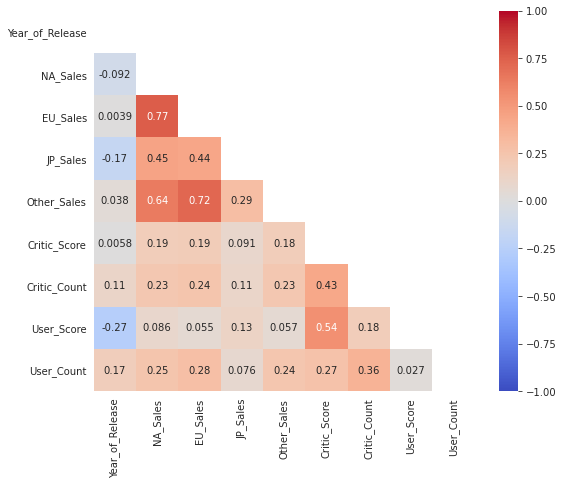

In [391]:
# plotting the correlation heatmap
corr = games_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Games without Critic Score

In [392]:
all_data_games_df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv") ## loading data

In [393]:
all_data_games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Data without critical value

I selected all data without critical columns(they have to many null value 1),
after cleaning I have 8434 rows and 10 column

In [394]:
# I selected all data without critical columns(they have to many null value 1)
all_games_df = all_data_games_df[all_data_games_df['Critic_Score'].isna()]

In [395]:
# checing which datatypes we have in our dataframe.
all_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8582 entries, 1 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8580 non-null   object 
 1   Platform         8582 non-null   object 
 2   Year_of_Release  8467 non-null   float64
 3   Genre            8580 non-null   object 
 4   Publisher        8532 non-null   object 
 5   NA_Sales         8582 non-null   float64
 6   EU_Sales         8582 non-null   float64
 7   JP_Sales         8582 non-null   float64
 8   Other_Sales      8582 non-null   float64
 9   Global_Sales     8582 non-null   float64
 10  Critic_Score     0 non-null      float64
 11  Critic_Count     0 non-null      float64
 12  User_Score       1916 non-null   object 
 13  User_Count       573 non-null    float64
 14  Developer        1965 non-null   object 
 15  Rating           1896 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.1+ MB


In [396]:
# droping column whith only null value 'Critic_Score', 'Critic_Count'
new_all_games_df = all_games_df.drop(columns = ['Critic_Score', 'Critic_Count', 'User_Score', 
                                                    'User_Count', 'Developer', 'Rating'])
new_all_games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [397]:
#not_name_df = games_df[games_df['Name'].isna()]
#not_name_df

In [398]:
# I extract from https://en.wikipedia.org/w/index.php?title=List_of_Acclaim_Entertainment_games&action=edit&section=4
#1993[edit]
# Game	  Developer	 Platform	Label	Notes
# 659=  Mortal Kombat	Sculptured Software (SNES)
# Probe Software (GB)	SNES, Game Boy	Acclaim	
# 14246= Super High Impact!	Beam Software	SNES	Acclaim	
# RoboCop 3	Eden Entertainment Software	Genesis, Sega Master System, Game Gear	Flying Edge	
# Alien 3	Probe Software	SNES	LJN	

In [399]:
#Conclusion: we can delet 2 rows whitout name, they are not imported
# in the column  'Genre' this rows have too the non-null value

In [400]:
# there are 115 games without Year release value
new_all_games_df['Year_of_Release'].value_counts(dropna=False)

2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
2006.0    386
2015.0    381
1998.0    351
2012.0    332
2014.0    320
1999.0    299
2005.0    284
1997.0    272
2013.0    271
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2002.0    202
2004.0    201
2003.0    190
2001.0    156
1994.0    120
NaN       115
1993.0     62
1981.0     46
1992.0     42
1991.0     41
1982.0     36
1986.0     21
1983.0     17
1989.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
2017.0      3
2020.0      1
Name: Year_of_Release, dtype: int64

In [401]:
list(new_all_games_df['Year_of_Release'])

[1985.0,
 1996.0,
 1989.0,
 1984.0,
 2005.0,
 1999.0,
 1990.0,
 2006.0,
 1989.0,
 1988.0,
 2002.0,
 2010.0,
 1998.0,
 2015.0,
 2013.0,
 1996.0,
 2009.0,
 2014.0,
 1992.0,
 1993.0,
 2004.0,
 2004.0,
 1996.0,
 1994.0,
 2013.0,
 1992.0,
 1997.0,
 2012.0,
 2007.0,
 2015.0,
 1982.0,
 1998.0,
 1997.0,
 2014.0,
 1988.0,
 2015.0,
 2016.0,
 2003.0,
 1996.0,
 2010.0,
 2011.0,
 1986.0,
 2000.0,
 1992.0,
 1992.0,
 1988.0,
 1999.0,
 2001.0,
 1999.0,
 1989.0,
 1999.0,
 1999.0,
 2014.0,
 2013.0,
 2003.0,
 1994.0,
 1995.0,
 1992.0,
 1996.0,
 2008.0,
 1999.0,
 1999.0,
 1998.0,
 2007.0,
 1997.0,
 2010.0,
 2014.0,
 1990.0,
 2014.0,
 2003.0,
 1991.0,
 2009.0,
 1981.0,
 2000.0,
 1987.0,
 2014.0,
 1991.0,
 2011.0,
 2014.0,
 1980.0,
 2014.0,
 2014.0,
 1995.0,
 2011.0,
 1989.0,
 1984.0,
 1997.0,
 1995.0,
 2006.0,
 1992.0,
 2005.0,
 1996.0,
 1997.0,
 1984.0,
 1994.0,
 1988.0,
 2011.0,
 1995.0,
 1992.0,
 1996.0,
 2009.0,
 2007.0,
 2011.0,
 1999.0,
 1998.0,
 2009.0,
 2015.0,
 1998.0,
 1999.0,
 1994.0,
 2013.0,
 

In [402]:
# we check for the null value in column 'Genre', this are the same rows that don't have 'Name',
# we delet only becouse 'Genre', null value, The 'Name' it is uniq like an ID, and we drop it for the model
# not_genre_df = games_df[games_df['Genre'].isna()]
# not_genre_df

Conclusion: The 'Name' of game is uniq like a ID, and we don't use him for modeling

In [403]:
new_all_games_df[new_all_games_df['Genre'].notna()]
new_all_games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


We have to drop the rows with null value from 'Year_of_Release' and 'Publisher', we are not sure about this data and we can not replace them whit mean or samthing else

In [404]:
# droping column whith only null value 'Year_of_Realease', 'Publisher'
new_all_games_df[new_all_games_df[('Year_of_Release')].notna()]
new_all_games_df 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [405]:
# checing which datatypes we have in our dataframe.
new_all_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8582 entries, 1 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8580 non-null   object 
 1   Platform         8582 non-null   object 
 2   Year_of_Release  8467 non-null   float64
 3   Genre            8580 non-null   object 
 4   Publisher        8532 non-null   object 
 5   NA_Sales         8582 non-null   float64
 6   EU_Sales         8582 non-null   float64
 7   JP_Sales         8582 non-null   float64
 8   Other_Sales      8582 non-null   float64
 9   Global_Sales     8582 non-null   float64
dtypes: float64(6), object(4)
memory usage: 737.5+ KB


In [406]:
# droping rows whith only null value 'Publisher'
new_all_games_df[new_all_games_df[('Publisher')].notna()]
 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [407]:
new_all_games_df.corr() #high correlation

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,1.000000,-0.191905,-0.082954,-0.222019,-0.008209,-0.197192
NA_Sales,-0.191905,1.000000,0.634773,0.480047,0.481834,0.922282
EU_Sales,-0.082954,0.634773,1.000000,0.464747,0.756782,0.819987
JP_Sales,-0.222019,0.480047,0.464747,1.000000,0.291378,0.705588
Other_Sales,-0.008209,0.481834,0.756782,0.291378,1.000000,0.635320
Global_Sales,-0.197192,0.922282,0.819987,0.705588,0.635320,1.000000


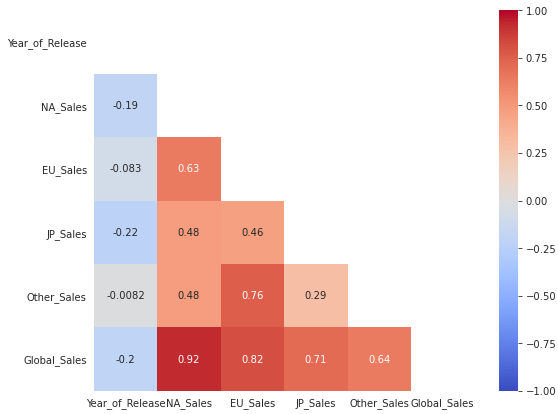

In [408]:
# plotting the correlation heatmap
corr = new_all_games_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [409]:
# Highly Correlated Columns
corr_matrix=new_all_games_df.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['Global_Sales']

In [410]:
# drop the ("Global_Sales"), it is hy corelated with NA_Sales (0.94), and EU_Sales(0.90)
new_all_games_df.drop(columns = ['Global_Sales'], inplace = True)

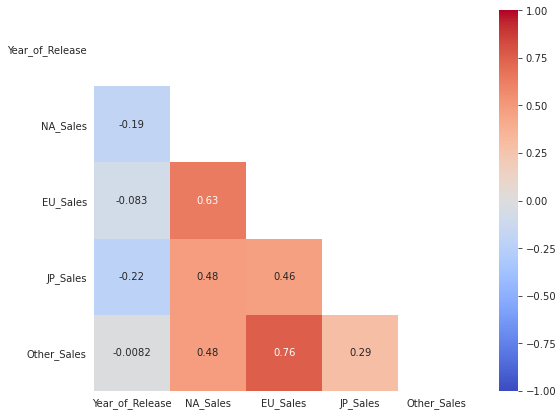

In [341]:
# plotting the correlation heatmap
corr = new_all_games_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Linear Regression

In [342]:
categoricals_games_df= new_all_games_df.select_dtypes("object")
categoricals_games_df

,Name,Platform,Genre,Publisher
1,Super Mario Bros.,NES,Platform,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
5,Tetris,GB,Puzzle,Nintendo
9,Duck Hunt,NES,Shooter,Nintendo
10,Nintendogs,DS,Simulation,Nintendo
...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,Action,Tecmo Koei
16715,LMA Manager 2007,X360,Sports,Codemasters
16716,Haitaka no Psychedelica,PSV,Adventure,Idea Factory
16717,Spirits & Spells,GBA,Platform,Wanadoo


In [343]:
categoricals_games_df.drop(columns=["Name"], inplace=True)

In [344]:
# checing which datatypes we have in our dataframe.
categoricals_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8582 entries, 1 to 16718
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Platform   8582 non-null   object
 1   Genre      8580 non-null   object
 2   Publisher  8532 non-null   object
dtypes: object(3)
memory usage: 268.2+ KB


In [345]:
# get dummies pandas
categoricals_dummy=pd.get_dummies(categoricals_games_df, drop_first=True)
categoricals_dummy

,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_20th Century Fox Video Games,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,Publisher_989 Studios,Publisher_AQ Interactive,Publisher_ASC Games,Publisher_ASCII Entertainment,Publisher_ASCII Media Works,Publisher_ASK,Publisher_Abylight,Publisher_Acclaim Entertainment,Publisher_Accolade,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Activision Value,Publisher_Adeline Software,Publisher_Aerosoft,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alawar Entertainment,Publisher_Alchemist,Publisher_Alternative Software,Publisher_Altron,Publisher_Alvion,Publisher_American Softworks,Publisher_Angel Studios,Publisher_Answer Software,Publisher_Aqua Plus,Publisher_Aques,Publisher_Arc System Works,Publisher_Arena Entertainment,Publisher_Aria,Publisher_Arika,Publisher_ArtDink,Publisher_Aruze Corp,Publisher_Ascaron Entertainment,Publisher_Ascaron Entertainment GmbH,Publisher_Asgard,Publisher_Asmik Ace Entertainment,Publisher_Asmik Corp,Publisher_Aspyr,Publisher_Astragon,Publisher_Asylum Entertainment,Publisher_Atari,Publisher_Athena,Publisher_Atlus,Publisher_Avalon Interactive,Publisher_Avanquest,Publisher_Avanquest Software,Publisher_Axela,Publisher_BAM! Entertainment,Publisher_BMG Interactive Entertainment,Publisher_BPS,Publisher_Banpresto,Publisher_Benesse,Publisher_Berkeley,Publisher_Bethesda Softworks,Publisher_Big Ben Interactive,Publisher_Big Fish Games,Publisher_Bigben Interactive,Publisher_Black Bean Games,Publisher_Blast! Entertainment Ltd,Publisher_Blue Byte,Publisher_Bomb,Publisher_Boost On,Publisher_Brash Entertainment,Publisher_Broccoli,Publisher_BushiRoad,Publisher_CBS Electronics,Publisher_CDV Software Entertainment,Publisher_CPG Products,Publisher_CTO SpA,Publisher_Capcom,Publisher_Cave,Publisher_ChunSoft,Publisher_City Interactive,Publisher_Cloud Imperium Games Corporation,Publisher_Coconuts Japan,Publisher_Codemasters,Publisher_CokeM Interactive,Publisher_Coleco,Publisher_Comfort,Publisher_Commseed,Publisher_Compile,Publisher_Compile Heart,Publisher_Conspiracy Entertainment,Publisher_Core Design Ltd.,Publisher_Crave Entertainment,Publisher_Creative Core,Publisher_Crimson Cow,Publisher_Crystal Dynamics,Publisher_Culture Brain,Publisher_Culture Publishers,Publisher_CyberFront,Publisher_Cygames,Publisher_D3Publisher,Publisher_DHM Interactive,Publisher_DSI Games,Publisher_DTP Entertainment,Publisher_Daedalic,Publisher_Daito,Publisher_Data Age,Publisher_Data Design Interactive,Publisher_Data East,Publisher_Datam Polystar,Publisher_Deep Silver,"Publisher_Destination Software, Inc",Publisher_Destineer,Publisher_Detn8 Games,Publisher_Devolver Digital,Publisher_DigiCube,Publisher_Disney Interactive Studios,Publisher_Dorart,Publisher_DreamCatcher Interactive,Publisher_DreamWorks Interactive,Publisher_Dusenberry Martin Racing,Publisher_EON Digital Entertainment,Publisher_ESP,Publisher_Easy Interactive,Publisher_Ecole,Publisher_Edia,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Electronic Arts Victor,Publisher_Elf,Publisher_Elite,Publisher_Empire Interactive,Publisher_Encore,Publisher_Enix Corporation,Publisher_Enjoy Gaming ltd.,Publisher_Enterbrain,Publisher_Epic Games,Publisher_Epoch,Publisher_Essential Games,Publisher_Evolution Games,Publisher_Excalibur Publishing,Publisher_Experience Inc.,Publisher_Extreme Entertainment Group,Publisher_Falcom Corporation

X/y splitting

In [413]:
X = categoricals_dummy
y = new_all_games_df["EU_Sales"]

Data splitting

In [414]:
# I will use standardscaler for the data. 
# I will fit it using train set and then apply this fit to both, train set and test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

1         3.58
4         8.89
5         2.26
9         0.63
10       10.95
         ...  
16714     0.00
16715     0.01
16716     0.00
16717     0.00
16718     0.00
Name: EU_Sales, Length: 8582, dtype: float64

# All data with critic value

In [ ]:
critical_df = old_games_df[old_games_df['Critic_Score'].notna()]

In [417]:
games_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.000000,51.000000,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,68.967679,26.360821,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.000000,73.000000,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.000000,73.000000,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,68.967679,26.360821,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,68.967679,26.360821,NaN,NaN,NaN,NaN


In [418]:
# checing which datatypes we have in our dataframe.
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16608 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16608 non-null  object 
 1   Platform         16608 non-null  object 
 2   Year_of_Release  16608 non-null  float64
 3   Genre            16608 non-null  object 
 4   Publisher        16599 non-null  object 
 5   NA_Sales         16608 non-null  float64
 6   EU_Sales         16608 non-null  float64
 7   JP_Sales         16608 non-null  float64
 8   Other_Sales      16608 non-null  float64
 9   Critic_Score     16608 non-null  float64
 10  Critic_Count     16608 non-null  float64
 11  User_Score       7590 non-null   float64
 12  User_Count       7590 non-null   float64
 13  Developer        10096 non-null  object 
 14  Rating           9950 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


In [ ]:
#games_df.drop(games_df[games_df.isnull().sum(axis=1)>6].index,axis=0,inplace=True)
# rows=16608, is deleting 111 rows

In [ ]:
#games_df.drop(columns = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating',
                             'Developer'])

In [ ]:
# checing which datatypes we have in our dataframe.
old_games_df.info()